In [1]:
#Basic and most important libraries
import pandas as pd , numpy as np
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler , MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

#Data processing functions
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [44]:
sns.set_theme()

In [2]:
ad = pd.read_csv("Advertising.csv")

In [3]:
ad.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
ad.shape

(200, 5)

In [7]:
ad.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [10]:
ad.drop(columns=["Unnamed: 0"],inplace=True)

In [11]:
ad.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [27]:
ad.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


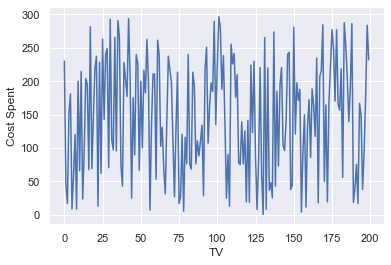

In [98]:
ad["TV"].plot()
plt.ylabel("Cost Spent")
plt.xlabel("TV")
plt.show()

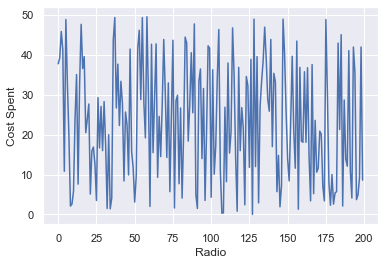

In [46]:
ad["Radio"].plot()
plt.ylabel("Cost Spent")
plt.xlabel("Radio")
plt.show()

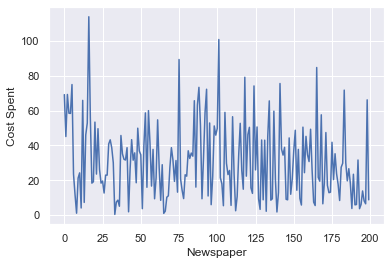

In [47]:
ad["Newspaper"].plot()
plt.ylabel("Cost Spent")
plt.xlabel("Newspaper")
plt.show()

In [48]:
correlation_mat = ad.corr()
correlation_mat

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

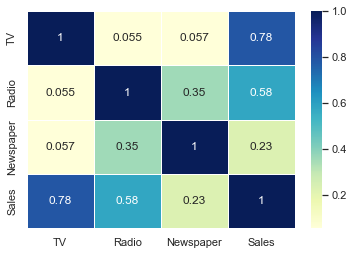

In [49]:
sns.heatmap(correlation_mat,annot=True,linewidths=.5,cmap="YlGnBu")

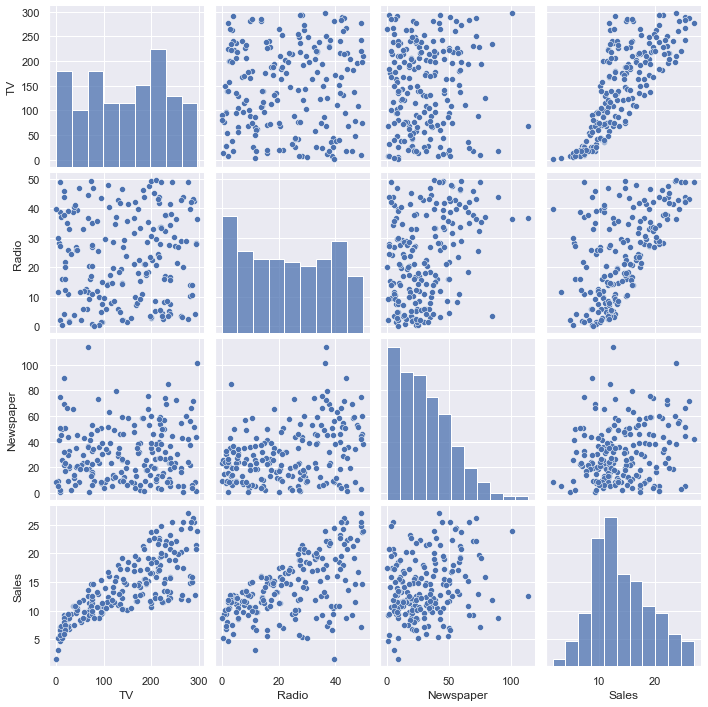

In [50]:
sns.pairplot(ad)
plt.show()

In [29]:
X = ad.drop(columns=["Sales"])
Y = ad["Sales"]
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

In [30]:
StSc = StandardScaler()
X_train  = StSc.fit_transform(X_train)
X_test  = StSc.fit_transform(X_test)

In [31]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [32]:
from sklearn.metrics import mean_absolute_error as mae
mae(y_test,y_pred)

1.5757310833981908

In [33]:
from sklearn.metrics import mean_squared_error as mse
mse(y_test, y_pred)

5.790370950349029

In [34]:
from sklearn.metrics import mean_absolute_percentage_error as mape
mape(y_test, y_pred)

0.257763905909439

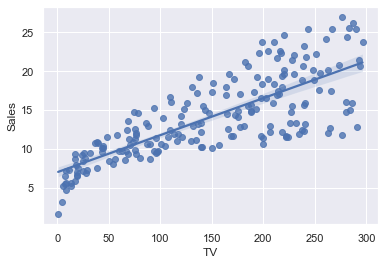

In [96]:
sns.regplot(x = 'TV' , y ='Sales', data = ad)
plt.xlabel("TV")
plt.ylabel("Sales")
plt.show()

In [79]:
X = ad["TV"]
Y = ad["Sales"]
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.25,random_state=0)
X_train_2 = np.array(X_train)
X_test_2 = np.array(X_test)
y_train_2 = np.array(y_train)
y_test_2 = np.array(y_test)
X_train_2 = X_train_2.reshape(-1,1)
X_test_2 = X_test_2.reshape(-1,1)
y_train_2 = y_train_2.reshape(-1,1)
y_test_2 = y_test_2.reshape(-1,1)

In [80]:
StSc = StandardScaler()
X_train_2  = StSc.fit_transform(X_train_2)
X_test_2  = StSc.fit_transform(X_test_2)

In [81]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train_2, y_train_2)
y_pred_2 = reg.predict(X_test_2)

In [83]:
from sklearn.metrics import mean_absolute_error as mae
mae(y_test_2,y_pred_2)

2.6800706026436005

In [84]:
from sklearn.metrics import mean_squared_error as mse
mse(y_test, y_pred)

10.536488616090992

In [85]:
from sklearn.metrics import mean_absolute_percentage_error as mape
mape(y_test, y_pred)

0.30815545204897576

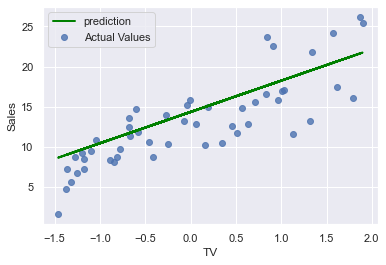

In [102]:
sns.regplot(X_test_2, y_test_2,fit_reg=False, label="Actual Values")
plt.plot(X_test_2, y_pred_2, color='green', linewidth=2, label="prediction")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.legend()
plt.show()